In [20]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
from pathlib import Path

In [21]:
Td_data = pd.read_csv("Stock Data - NYSE_TD.csv", infer_datetime_format=True, parse_dates=True, index_col="Date").dropna()
Bmo_data = pd.read_csv("Stock Data - TSE_BMO.csv",infer_datetime_format=True, parse_dates=True, index_col="Date").dropna()
RY_data = pd.read_csv("Stock Data - TSE_RY.csv",  infer_datetime_format=True, parse_dates=True, index_col="Date").dropna()
BNS_data = pd.read_csv("Stock Data - TSE_BNS.csv",  infer_datetime_format=True, parse_dates=True, index_col="Date").dropna()
SP500_data = pd.read_csv("Stock Data - S&P 500.csv",  infer_datetime_format=True, parse_dates=True, index_col="Date").dropna()

In [22]:
SP500_data = pd.read_csv("Stock Data - S&P 500.csv",  infer_datetime_format=True, parse_dates=True, index_col="Date").dropna()
SP500_data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-04-01 16:00:00,2038.20,2038.20,1989.68,2012.66,802072115
2016-05-01 16:00:00,2013.78,2021.94,2004.17,2016.71,619260483
2016-06-01 16:00:00,2011.71,2011.71,1979.05,1990.26,734820348
2016-07-01 16:00:00,1985.32,1985.32,1938.83,1943.09,860517477
2016-08-01 16:00:00,1945.97,1960.40,1918.46,1922.03,800798104


In [23]:
SP500_data.describe()


,Open,High,Low,Close,Volume
count,1510.000000,1510.000000,1510.000000,1510.000000,1.510000e+03
mean,2947.880861,2962.445086,2932.223722,2948.533907,1.944856e+09
std,715.820076,719.320943,713.003573,716.431760,8.490855e+08
min,1833.400000,1847.000000,1810.100000,1829.080000,4.309713e+06
25%,2431.940000,2441.522500,2420.930000,2432.480000,1.639540e+09
50%,2798.590000,2809.310000,2782.160000,2798.325000,2.023091e+09
75%,3279.750000,3287.575000,3253.190000,3275.690000,2.355154e+09
max,4795.490000,4808.930000,4780.040000,4793.060000,5.303923e+09


In [24]:
SP500_data.value_counts()


Open     High     Low      Close    Volume    
1833.40  1864.78  1833.40  1864.78  803669163     1
3003.36  3013.92  3001.87  3013.77  1609598303    1
3012.13  3015.02  3001.15  3004.04  1742567428    1
3010.73  3014.57  2995.04  2995.99  1843264600    1
3010.36  3021.99  3003.16  3006.79  1552070564    1
                                                 ..
2580.31  2589.32  2570.41  2582.61  2242883039    1
2580.18  2583.81  2575.57  2582.30  2045161765    1
2580.00  2595.32  2568.89  2584.96  2463516870    1
2579.49  2584.64  2578.24  2582.14  1786156942    1
4795.49  4807.02  4780.04  4786.35  1425097588    1
Length: 1510, dtype: int64

 ## Combine DataFrames, Sort Index, and Rename Columns

In [25]:
Stock_concat = pd.concat([Td_data, Bmo_data, RY_data, BNS_data], axis=1, join="inner", keys=["BMO", "TD", "BNS", "RY", "S&P 500"]).dropna().reset_index()

# Sort datetime index in ascending order (past to present)
Stock_concat = Stock_concat.sort_index()

# Display a few rows
Stock_concat.head()

Date    BMO                                   TD         \
                        Open   High    Low  Close   Volume   Open   High   
0 2016-04-01 16:00:00  38.63  38.64  38.14  38.56  1559196  76.82  76.99   
1 2016-05-01 16:00:00  38.60  38.72  37.99  38.26  1581170  76.67  77.05   
2 2016-07-01 16:00:00  36.44  36.89  36.20  36.22  1629706  73.78  74.22   
3 2016-11-01 16:00:00  36.40  36.42  35.82  36.09  1602427  73.68  73.94   
4 2016-12-01 16:00:00  36.55  36.89  36.21  36.73  2972123  73.98  74.63   

                 ...    BNS                                   RY         \
     Low  Close  ...   Open   High    Low  Close   Volume   Open   High   
0  76.04  76.66  ...  73.27  73.27  72.05  73.04  2359551  55.25  55.69   
1  76.11  76.62  ...  73.21  73.58  72.36  72.82  2276700  55.61  56.28   
2  73.13  73.52  ...  70.50  70.98  70.20  70.25  3636462  54.50  54.78   
3  73.07  73.61  ...  70.32  70.47  69.86  70.41  2294066  54.83  54.87   
4  73.27  74.18  ...  70.88  71.43  70.04  70.92  2765805  54.45  54.75   

                          
     Low  Close   Volume  
0  54.75  55.54  2979360  
1  55.31  56.13  2374476  
2  54.02  54.31  2530820  
3  53.82  54.19  2864681  
4  53.36  54.05  2733904  

[5 rows x 21 columns]

In [26]:
type(Stock_concat["Date"])

Stock_concat["Date"] = pd.to_datetime(Stock_concat["Date"])
Stock_concat

Date    BMO                                    TD          \
                           Open   High    Low  Close   Volume    Open    High   
0    2016-04-01 16:00:00  38.63  38.64  38.14  38.56  1559196   76.82   76.99   
1    2016-05-01 16:00:00  38.60  38.72  37.99  38.26  1581170   76.67   77.05   
2    2016-07-01 16:00:00  36.44  36.89  36.20  36.22  1629706   73.78   74.22   
3    2016-11-01 16:00:00  36.40  36.42  35.82  36.09  1602427   73.68   73.94   
4    2016-12-01 16:00:00  36.55  36.89  36.21  36.73  2972123   73.98   74.63   
...                  ...    ...    ...    ...    ...      ...     ...     ...   
1461 2021-12-21 16:00:00  73.43  73.47  73.00  73.36  1426818  132.90  133.80   
1462 2021-12-22 16:00:00  73.25  74.36  73.25  74.35  1169767  132.94  135.43   
1463 2021-12-23 16:00:00  74.71  75.25  74.60  75.13  1026264  135.60  137.20   
1464 2021-12-29 16:00:00  76.24  76.65  76.05  76.19  1256191  137.77  138.25   
1465 2021-12-30 16:00:00  76.27  76.63  76.09  76.30   841164  137.21  137.60   

                      ...     BNS                                      RY  \
         Low   Close  ...    Open    High     Low   Close   Volume   Open   
0      76.04   76.66  ...   73.27   73.27   72.05   73.04  2359551  55.25   
1      76.11   76.62  ...   73.21   73.58   72.36   72.82  2276700  55.61   
2      73.13   73.52  ...   70.50   70.98   70.20   70.25  3636462  54.50   
3      73.07   73.61  ...   70.32   70.47   69.86   70.41  2294066  54.83   
4      73.27   74.18  ...   70.88   71.43   70.04   70.92  2765805  54.45   
...      ...     ...  ...     ...     ...     ...     ...      ...    ...   
1461  132.01  133.14  ...  130.82  132.00  130.52  131.57  2894060  87.60   
1462  132.90  135.35  ...  131.30  132.59  131.28  132.59  1997840  87.65   
1463  135.57  135.58  ...  132.95  133.95  132.83  133.64  3240003  88.70   
1464  136.77  136.94  ...  134.70  135.34  134.59  134.79  2976264  91.00   
1465  136.48  136.59  ...  134.99  135.24  134.43  134.46  1194130  91.67   

                                     
       High    Low  Close    Volume  
0     55.69  54.75  55.54   2979360  
1     56.28  55.31  56.13   2374476  
2     54.78  54.02  54.31   2530820  
3     54.87  53.82  54.19   2864681  
4     54.75  53.36  54.05   2733904  
...     ...    ...    ...       ...  
1461  88.18  87.37  87.69   4874198  
1462  88.70  87.56  88.67   4637710  
1463  89.72  88.70  89.31   3525201  
1464  91.49  90.61  91.22   7349212  
1465  91.77  91.24  91.26  10531099  

[1466 rows x 21 columns]

In [27]:
Stock_concat.set_index("Date", inplace=True)

In [28]:
Stock_concat.index = Stock_concat.index.date

In [29]:
Stock_concat.describe()

BMO                                                       \
              Open         High          Low        Close        Volume   
count  1466.000000  1466.000000  1466.000000  1466.000000  1.466000e+03   
mean     54.079031    54.437353    53.715477    54.082169  1.521128e+06   
std       8.659822     8.665138     8.688693     8.663666  7.994694e+05   
min      33.950000    34.360000    33.490000    33.830000  2.564080e+05   
25%      47.130000    47.482500    46.830000    47.095000  1.026498e+06   
50%      55.550000    55.885000    55.200000    55.510000  1.324180e+06   
75%      58.245000    58.490000    57.955000    58.222500  1.739022e+06   
max      76.270000    76.650000    76.090000    76.300000  9.254871e+06   

                TD                                                       \
              Open         High          Low        Close        Volume   
count  1466.000000  1466.000000  1466.000000  1466.000000  1.466000e+03   
mean     97.057572    97.646664    96.461910    97.068022  1.897911e+06   
std      15.549408    15.542439    15.618791    15.579969  1.260332e+06   
min      58.620000    60.000000    55.760000    56.240000  3.985360e+05   
25%      86.210000    86.605000    85.925000    86.272500  1.098802e+06   
50%      97.700000    98.200000    97.245000    97.720000  1.481028e+06   
75%     102.320000   102.787500   101.997500   102.417500  2.210473e+06   
max     140.570000   141.370000   140.010000   140.270000  1.160972e+07   

               BNS                                                       \
              Open         High          Low        Close        Volume   
count  1466.000000  1466.000000  1466.000000  1466.000000  1.466000e+03   
mean     99.512688   100.093540    98.943970    99.543247  3.067858e+06   
std      14.193973    14.180404    14.226345    14.196212  2.000851e+06   
min      65.300000    65.440000    64.520000    65.000000  7.678010e+05   
25%      92.950000    93.545000    92.420000    92.972500  1.816583e+06   
50%      99.665000   100.160000    99.020000    99.645000  2.423241e+06   
75%     105.162500   105.600000   104.682500   105.197500  3.551663e+06   
max     134.990000   135.340000   134.590000   134.790000  1.446510e+07   

                RY                                                       
              Open         High          Low        Close        Volume  
count  1466.000000  1466.000000  1466.000000  1466.000000  1.466000e+03  
mean     71.999604    72.424509    71.560832    72.003015  2.979789e+06  
std       8.463937     8.386112     8.567416     8.477017  2.094495e+06  
min      49.140000    50.570000    46.380000    46.720000  6.672250e+05  
25%      68.240000    68.712500    67.805000    68.262500  1.685454e+06  
50%      74.450000    74.740000    74.090000    74.470000  2.312329e+06  
75%      78.180000    78.527500    77.710000    78.110000  3.473010e+06  
max      91.670000    91.770000    91.240000    91.260000  2.099180e+07

In [30]:
Stock_concat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1466 entries, 2016-04-01 to 2021-12-30
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (BMO, Open)    1466 non-null   float64
 1   (BMO, High)    1466 non-null   float64
 2   (BMO, Low)     1466 non-null   float64
 3   (BMO, Close)   1466 non-null   float64
 4   (BMO, Volume)  1466 non-null   int64  
 5   (TD, Open)     1466 non-null   float64
 6   (TD, High)     1466 non-null   float64
 7   (TD, Low)      1466 non-null   float64
 8   (TD, Close)    1466 non-null   float64
 9   (TD, Volume)   1466 non-null   int64  
 10  (BNS, Open)    1466 non-null   float64
 11  (BNS, High)    1466 non-null   float64
 12  (BNS, Low)     1466 non-null   float64
 13  (BNS, Close)   1466 non-null   float64
 14  (BNS, Volume)  1466 non-null   int64  
 15  (RY, Open)     1466 non-null   float64
 16  (RY, High)     1466 non-null   float64
 17  (RY, Low)      1466 non-null   float64
 18

## Evaluate the Riskiness of Stocks

In [31]:
volatility = Stock_concat.std() * np.sqrt(252)

In [32]:
volatility = volatility.sort_values()

In [33]:
volatility

RY   High      1.331254e+02
     Open      1.343608e+02
     Close     1.345685e+02
     Low       1.360035e+02
BMO  Open      1.374704e+02
     Close     1.375314e+02
     High      1.375548e+02
     Low       1.379287e+02
BNS  High      2.251069e+02
     Open      2.253223e+02
     Close     2.253579e+02
     Low       2.258362e+02
TD   High      2.467286e+02
     Open      2.468392e+02
     Close     2.473243e+02
     Low       2.479406e+02
BMO  Volume    1.269118e+07
TD   Volume    2.000715e+07
BNS  Volume    3.176253e+07
RY   Volume    3.324907e+07
dtype: float64

In [34]:
daily_returns = Stock_concat.pct_change().dropna()
daily_returns

BMO                                                TD  \
                Open      High       Low     Close    Volume      Open   
2016-05-01 -0.000777  0.002070 -0.003933 -0.007780  0.014093 -0.001953   
2016-07-01 -0.055959 -0.047262 -0.047118 -0.053319  0.030696 -0.037694   
2016-11-01 -0.001098 -0.012741 -0.010497 -0.003589 -0.016739 -0.001355   
2016-12-01  0.004121  0.012905  0.010888  0.017733  0.854763  0.004072   
2016-01-13  0.014774  0.005422 -0.013532 -0.022870 -0.280689  0.006488   
...              ...       ...       ...       ...       ...       ...   
2021-12-21  0.014367  0.008788  0.015440  0.010329 -0.251536  0.006818   
2021-12-22 -0.002451  0.012114  0.003425  0.013495 -0.180157  0.000301   
2021-12-23  0.019932  0.011969  0.018430  0.010491 -0.122677  0.020009   
2021-12-29  0.020479  0.018605  0.019437  0.014109  0.224043  0.016003   
2021-12-30  0.000393 -0.000261  0.000526  0.001444 -0.330385 -0.004065   

                                                         BNS            \
                High       Low     Close    Volume      Open      High   
2016-05-01  0.000779  0.000921 -0.000522 -0.246941 -0.000819  0.004231   
2016-07-01 -0.036729 -0.039154 -0.040459  0.699706 -0.037017 -0.035336   
2016-11-01 -0.003773 -0.000820  0.001224 -0.449301 -0.002553 -0.007185   
2016-12-01  0.009332  0.002737  0.007744  0.109692  0.007964  0.013623   
2016-01-13  0.001742 -0.017606 -0.029388  1.192823  0.005926  0.000980   
...              ...       ...       ...       ...       ...       ...   
2021-12-21  0.006469  0.014447  0.012164 -0.360652  0.006695  0.007787   
2021-12-22  0.012182  0.006742  0.016599 -0.124869  0.003669  0.004470   
2021-12-23  0.013069  0.020090  0.001699 -0.059906  0.012567  0.010257   
2021-12-29  0.007653  0.008852  0.010031  0.328662  0.013163  0.010377   
2021-12-30 -0.004702 -0.002120 -0.002556 -0.616058  0.002153 -0.000739   

                                                RY                      \
                 Low     Close    Volume      Open      High       Low   
2016-05-01  0.004303 -0.003012 -0.035113  0.006516  0.010594  0.010228   
2016-07-01 -0.029851 -0.035293  0.597251 -0.019960 -0.026652 -0.023323   
2016-11-01 -0.004843  0.002278 -0.369149  0.006055  0.001643 -0.003702   
2016-12-01  0.002577  0.007243  0.205634 -0.006931 -0.002187 -0.008547   
2016-01-13 -0.013992 -0.024958  0.160170 -0.004591 -0.008037 -0.007309   
...              ...       ...       ...       ...       ...       ...   
2021-12-21  0.007565  0.012155  0.000086  0.010614  0.013563  0.016876   
2021-12-22  0.005823  0.007753 -0.309676  0.000571  0.005897  0.002175   
2021-12-23  0.011807  0.007919  0.621753  0.011979  0.011499  0.013020   
2021-12-29  0.013250  0.008605 -0.081401  0.025930  0.019728  0.021533   
2021-12-30 -0.001189 -0.002448 -0.598782  0.007363  0.003060  0.006953   

                                
               Close    Volume  
2016-05-01  0.010623 -0.203025  
2016-07-01 -0.032425  0.065844  
2016-11-01 -0.002210  0.131918  
2016-12-01 -0.002584 -0.045652  
2016-01-13 -0.019426 -0.048097  
...              ...       ...  
2021-12-21  0.009904  0.116112  
2021-12-22  0.011176 -0.048518  
2021-12-23  0.007218 -0.239883  
2021-12-29  0.021386  1.084764  
2021-12-30  0.000439  0.432956  

[1465 rows x 20 columns]

In [35]:
Stock_concat.isnull().mean() * 100

BMO  Open      0.0
     High      0.0
     Low       0.0
     Close     0.0
     Volume    0.0
TD   Open      0.0
     High      0.0
     Low       0.0
     Close     0.0
     Volume    0.0
BNS  Open      0.0
     High      0.0
     Low       0.0
     Close     0.0
     Volume    0.0
RY   Open      0.0
     High      0.0
     Low       0.0
     Close     0.0
     Volume    0.0
dtype: float64

In [36]:
Stock_concat.isnull().sum()

BMO  Open      0
     High      0
     Low       0
     Close     0
     Volume    0
TD   Open      0
     High      0
     Low       0
     Close     0
     Volume    0
BNS  Open      0
     High      0
     Low       0
     Close     0
     Volume    0
RY   Open      0
     High      0
     Low       0
     Close     0
     Volume    0
dtype: int64

In [37]:
correlation = daily_returns.corr()
correlation

BMO                                                TD  \
                Open      High       Low     Close    Volume      Open   
BMO Open    1.000000  0.642037  0.799078  0.518576 -0.011209  0.766515   
    High    0.642037  1.000000  0.672365  0.639829  0.015772  0.516987   
    Low     0.799078  0.672365  1.000000  0.811727 -0.112488  0.644536   
    Close   0.518576  0.639829  0.811727  1.000000 -0.071354  0.421841   
    Volume -0.011209  0.015772 -0.112488 -0.071354  1.000000  0.000283   
TD  Open    0.766515  0.516987  0.644536  0.421841  0.000283  1.000000   
    High    0.630069  0.631427  0.677840  0.622486  0.019747  0.761815   
    Low     0.641223  0.576957  0.789527  0.696875 -0.041864  0.760251   
    Close   0.449638  0.542084  0.670870  0.816641 -0.022992  0.468475   
    Volume  0.005410  0.005977 -0.058407 -0.055537  0.211140 -0.023652   
BNS Open    0.761574  0.513047  0.652562  0.474430  0.012207  0.744418   
    High    0.615422  0.634003  0.716354  0.693147  0.011537  0.600547   
    Low     0.661157  0.576287  0.814414  0.686394 -0.072341  0.635702   
    Close   0.398499  0.500631  0.662249  0.813363 -0.062075  0.360555   
    Volume  0.004461  0.014959 -0.042604 -0.020258  0.159788  0.004504   
RY  Open    0.766786  0.498788  0.632791  0.420739  0.003137  0.767227   
    High    0.622237  0.649187  0.688295  0.666108  0.013440  0.619847   
    Low     0.633023  0.567691  0.790473  0.683539 -0.073583  0.622998   
    Close   0.444775  0.546779  0.684751  0.825671 -0.041510  0.411179   
    Volume -0.029314 -0.005573 -0.079832 -0.048356  0.196637 -0.018162   

                                                         BNS            \
                High       Low     Close    Volume      Open      High   
BMO Open    0.630069  0.641223  0.449638  0.005410  0.761574  0.615422   
    High    0.631427  0.576957  0.542084  0.005977  0.513047  0.634003   
    Low     0.677840  0.789527  0.670870 -0.058407  0.652562  0.716354   
    Close   0.622486  0.696875  0.816641 -0.055537  0.474430  0.693147   
    Volume  0.019747 -0.041864 -0.022992  0.211140  0.012207  0.011537   
TD  Open    0.761815  0.760251  0.468475 -0.023652  0.744418  0.600547   
    High    1.000000  0.819834  0.760484  0.036816  0.601024  0.747281   
    Low     0.819834  1.000000  0.814959 -0.111419  0.628465  0.707370   
    Close   0.760484  0.814959  1.000000 -0.049667  0.469024  0.680088   
    Volume  0.036816 -0.111419 -0.049667  1.000000 -0.011144  0.005717   
BNS Open    0.601024  0.628465  0.469024 -0.011144  1.000000  0.759596   
    High    0.747281  0.707370  0.680088  0.005717  0.759596  1.000000   
    Low     0.679623  0.798739  0.689551 -0.064041  0.785216  0.839135   
    Close   0.575014  0.667600  0.825647 -0.047224  0.460942  0.783200   
    Volume  0.033851 -0.031714  0.004359  0.506847  0.014820  0.035056   
RY  Open    0.581035  0.621142  0.402431 -0.011807  0.751572  0.587074   
    High    0.791950  0.715151  0.670781  0.012021  0.634090  0.789523   
    Low     0.664753  0.821412  0.679221 -0.086707  0.607927  0.695336   
    Close   0.637261  0.707476  0.837803 -0.068543  0.474926  0.708999   
    Volume -0.002156 -0.076294 -0.056545  0.536518 -0.010241 -0.001994   

                                                RY                      \
                 Low     Close    Volume      Open      High       Low   
BMO Open    0.661157  0.398499  0.004461  0.766786  0.622237  0.633023   
    High    0.576287  0.500631  0.014959  0.498788  0.649187  0.567691   
    Low     0.814414  0.662249 -0.042604  0.632791  0.688295  0.790473   
    Close   0.686394  0.813363 -0.020258  0.420739  0.666108  0.683539   
    Volume -0.072341 -0.062075  0.159788  0.003137  0.013440 -0.073583   
TD  Open    0.635702  0.360555  0.004504  0.767227  0.619847  0.622998   
    High    0.679623  0.575014  0.033851  0.581035  0.791950  0.664753   
    Low     0.798739  0.667600 -0.031714  0.621142  0.715151  0.821412   
    Close   0.68955

## Plot Correlation

<AxesSubplot:xlabel='None-None', ylabel='None-None'>

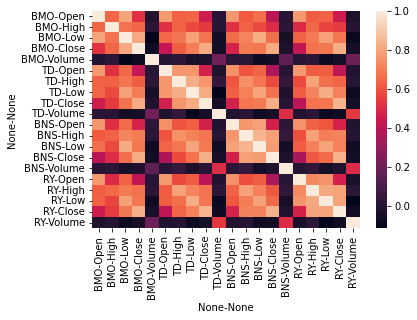

In [38]:
# Create a heatmap from the correlation values
sns.heatmap(correlation)

In [47]:
Td_data

,Open,High,Low,Close,Volume
Date,,,,,
2016-04-01 16:00:00,38.63,38.64,38.14,38.56,1559196
2016-05-01 16:00:00,38.60,38.72,37.99,38.26,1581170
2016-06-01 16:00:00,37.49,37.57,37.00,37.05,1525745
2016-07-01 16:00:00,36.44,36.89,36.20,36.22,1629706
2016-08-01 16:00:00,36.62,36.69,36.03,36.06,1364997
...,...,...,...,...,...
2021-12-23 16:00:00,74.71,75.25,74.60,75.13,1026264
2021-12-27 16:00:00,75.28,76.58,75.16,76.47,845378
2021-12-28 16:00:00,76.37,77.20,76.37,76.50,964867


<AxesSubplot:xlabel='None-None', ylabel='None-None'>

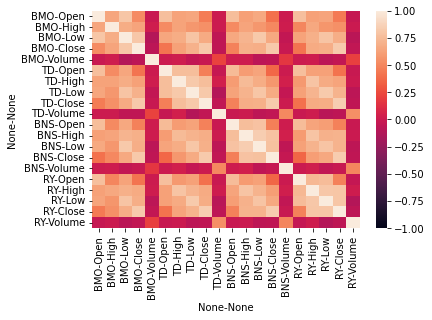

In [39]:
# Create a heatmap from the correlation values and adjust the scale
sns.heatmap(correlation, vmin=-1, vmax=1) 

## Plot daily Closing Price of each stocks

<AxesSubplot:xlabel='Date'>

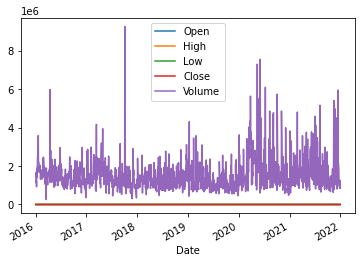

In [46]:
Td_data.plot()

<AxesSubplot:xlabel='Date'>

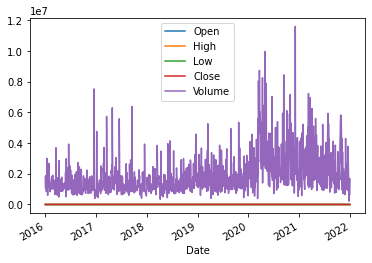

<AxesSubplot:xlabel='Date'>

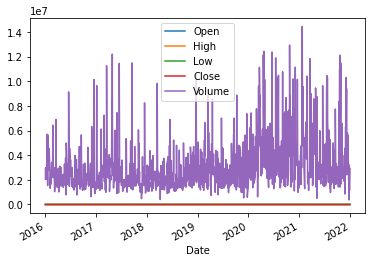

In [43]:
RY_data.plot()

<AxesSubplot:xlabel='Date'>

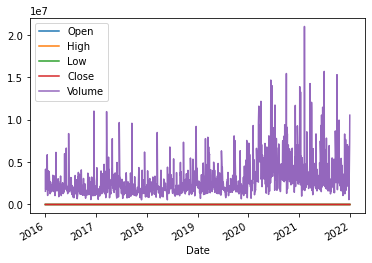

In [44]:
BNS_data.plot()